# Boston Housing Price Prediction
This notebook trains a few machine learning models on the Boston Housing dataset

## Imports

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

## Loading, processing, and analysing the data

In [168]:
# Importing Data
from sklearn.datasets import load_boston
boston = load_boston()
print("The data is a 2D matrix of size", boston.data.shape)
print("There are 506 houses in the sample, each with 13 features, which will be used to predict the target - price.")



data = pd.read_csv('boston copy.txt', sep=" ", header=None)
data.columns = ["a", "b", "c", "etc."]




# Loading the data into a pandas dataframe
data = pd.DataFrame(boston.data)
# Setting the columns to the correct names
data.columns = boston.feature_names
# Setting the target column
data['Price'] = boston.target 
data.describe() 

The data is a 2D matrix of size (506, 13)
There are 506 houses in the sample, each with 13 features, which will be used to predict the target - price.


FileNotFoundError: [Errno 2] File boston copy.txt does not exist: 'boston copy.txt'

In [101]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
print("Here are the first 5 data points:")
data.head() 

Here are the first 5 data points:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
print("Here is some information about the dataframe object:")
data.info() 

Lastly, here is some information about the dataframe object:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


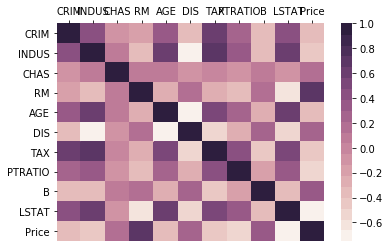

In [109]:
# print("We can remove some of the columns which may not relate to price.")
# for col in ['NOX', 'RAD', 'PTRATIO', 'B']:
#     del data[col]
# data.head()

# The above table shows the correlation between each set of value. Large positive scores between the features show that there is a strong positive correlation. We see a maximum of value 1 in all the diagonal values.
data[data.columns].corr()

ax = sns.heatmap(data[data.columns].corr(), cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top()

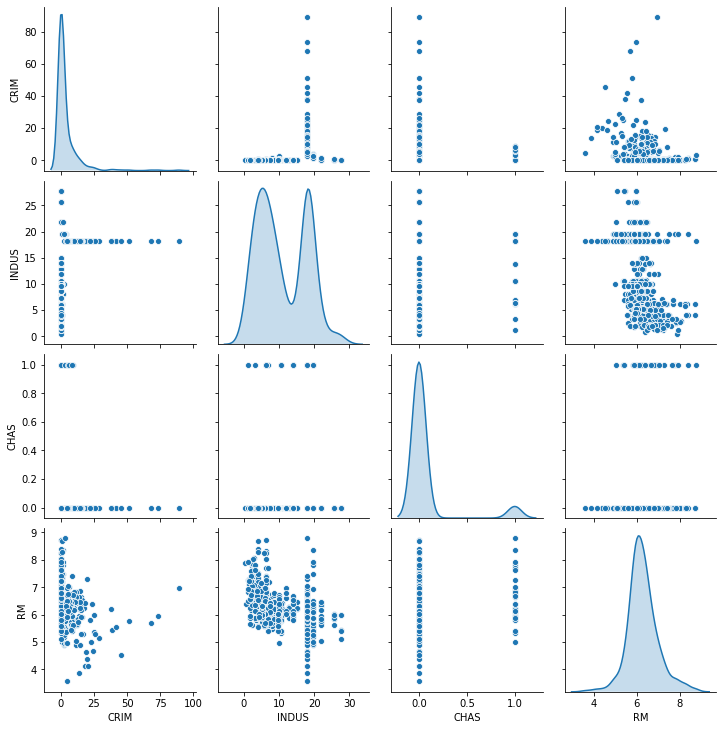

In [115]:
# sns.pairplot(data[data.columns], plot_kws={'alpha': 0.6}, diag_kws={'bins':30})
sns.pairplot(data[["CRIM", "INDUS", "CHAS", "RM"]], diag_kind="kde")
# RM and MEDV have the shape like that in a normally distributed graph.

# AGE is skewed to the left and LSTAT is skewed to the right.

# TAX has a large amount of distribution around the point 700.

## Next, we split the data in order to train our model

In [133]:
# Input Data 
x = boston.data 
   
# Output Data 
y = boston.target 

# Splitting the data using SciKit Learn
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0) 

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


## Train the first model - a linear model created using the SciKit functionality

In [20]:
# Fitting Multi Linear regression model to training model 

regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_pred = regressor.predict(xtest) 

## Plot the results
A perfectly accurate model will achive a straight line where prediction = true value

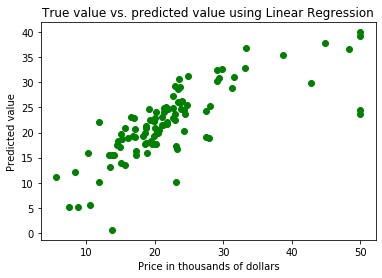

The Mean Square Error is 33.44897999767653 . This indicates our model was (100%-33%) = 67% accurate.
The model performs relatively well considering it was linear, a positive correlation can be clearly seen.
However, this model is underfitting - generalizing with a high level of bias.
Much better results can be achived with more complex models.


In [28]:
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price in thousands of dollars") 
plt.ylabel("Predicted value") 
plt.title("True value vs. predicted value using Linear Regression") 
plt.show() 
# Results of Linear Regression. 
mse = mean_squared_error(ytest, y_pred) 
print("The Mean Square Error is", mse, ". This indicates our model was (100%-33%) = 67% accurate.") 
print("The model performs relatively well considering it was linear, a positive correlation can be clearly seen.")
print("However, this model is underfitting - generalizing with a high level of bias.")
print("Much better results can be achived with more complex models.")

## Training a model using a decision tree algorithm paired with grid search
A decision tree asks a number of questions to determine the target. In addition, we will use SciKit's built in functionality to find the best possible tree.

In [88]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
print("This implies 92.3% of the variation in the data is explained by the price - this is high.")


# Using grid search
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create new similar function
def fit_model_2(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    rand = rand.fit(X, y)

    # Return the optimal model after fitting the data
    return rand.best_estimator_

Model has a coefficient of determination, R^2, of 0.923.
This implies 92.3% of the variation in the data is explained by the price - this is high.


In [159]:
# Fit the training data to the model using grid search
reg = fit_model(xtrain, ytrain)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is ", reg.get_params()['max_depth'], " for the optimal model.")

# Fit the training data to the 1st model using random search
reg = fit_model(xtrain, ytrain)
y_pred_1 = reg.predict(xtest) 

# Fit the training data to the 2nd model using random search
reg_2 = fit_model_2(xtrain, ytrain)
y_pred_2 = reg_2.predict(xtest) 


# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg_2.get_params()['max_depth']))

Parameter 'max_depth' is  6  for the optimal model.
Parameter 'max_depth' is 6 for the optimal model.


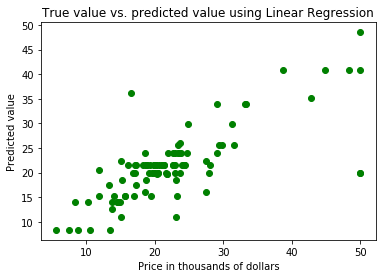

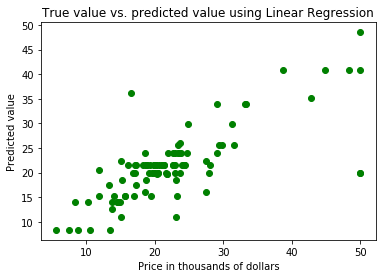

The Mean Square Error is 35.407037595251765  for both models. This indicates our models were (100%-35%)=65% accurate.
Once again, a positive correlation can be clearly seen.
A better model is still needed.


In [164]:
plt.scatter(ytest, y_pred_1, c = 'green') 
plt.xlabel("Price in thousands of dollars") 
plt.ylabel("Predicted value") 
plt.title("True value vs. predicted value using Linear Regression") 
plt.show() 
# Results of Linear Regression. 
mse1 = mean_squared_error(ytest, y_pred_1) 

plt.scatter(ytest, y_pred_2, c = 'green') 
plt.xlabel("Price in thousands of dollars") 
plt.ylabel("Predicted value") 
plt.title("True value vs. predicted value using Linear Regression") 
plt.show() 
# Results of Linear Regression. 
mse2 = mean_squared_error(ytest, y_pred_2) 
print("The Mean Square Error is", mse2, " for both models. This indicates our models were (100%-35%)=65% accurate.") 
print("Once again, a positive correlation can be clearly seen.")
print("A better model is still needed.")

## Training the model using tensorflow with tensorboard visualizations

In [155]:
import tensorboard
import datetime
!rm -rf ./logs/ 
%load_ext tensorboard

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=13, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # 20% chance of dropping a nodes in each layer for a given forward pass
    tf.keras.layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])  # we will use the mean squared error and the mean absolute error to judge our model.
model.summary()


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# This will stop the model if it is no longer improving
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(xtrain, ytrain, epochs=1000, validation_split = 0.2, verbose=1, callbacks = [early_stop, tensorboard_callback])


%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 13,441
Trainable

Reusing TensorBoard on port 6006 (pid 50526), started 0:09:18 ago. (Use '!kill 50526' to kill it.)

## Further evaluating the results

102/1 - 0s - loss: 13.6072 - mae: 3.0280 - mse: 21.3692
Testing set Mean Abs Error:  3.03 MPG


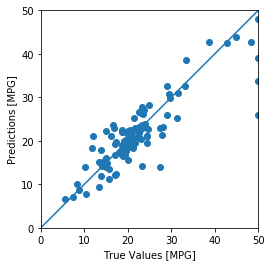

In [154]:
# plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([0, 10])
# plt.ylabel('MAE [MPG]')

loss, mae, mse = model.evaluate(xtest, ytest, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

test_predictions = model.predict(xtest).flatten()

a = plt.axes(aspect='equal')
plt.scatter(ytest, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

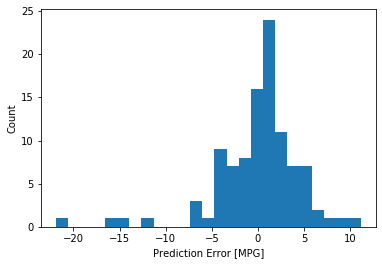

In [145]:
# looking at the errors - Gaussian standard normal distribution (good)
error = test_predictions - ytest
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")